In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화(추세 등)패키지.
import seaborn as sns
# 통계 분석 패키지
from scipy import stats
import scipy.stats
# 쥬피터로 그래프 그리기 위한 장치
%matplotlib inline
# 한글폰트 적용
matplotlib.rc('font', family = 'Malgun Gothic')
plt.rc('font', family = 'Malgun Gothic')

In [4]:
# 데이터 시각화(추세 등)패키지.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# 가설검정 및 통계 분석 패키지
from scipy import stats
# 선형모델 formula(y~x1+x2+...)
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
# 쥬피터로 그래프 그리기 위한 장치
%matplotlib inline

## [실습] 평균검정(모집단 표준편차를 모르는 경우)

In [5]:
# 모표준편차 모를때는 t검정 사용해야함. 알때는 Z검정
# df를 직접 입력
df = pd.DataFrame({'sample':[85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# t-Sample t-test
t_result = stats.ttest_1samp(df, 78.0)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value : {}".format(p))

# 결론
# p-value 가 유의수준인 0.05보다 작기 때문에 개선활동이 만족도를 높였다고
# 할 수 있다.

1-Sample t-test
t 통계량:[3.379]
p-value : [0.008]


## [실습] 2Sample t-test
### 추가 : 다중 t-test를 진행하기 위해 
### 가정한 정규성과 등분산성을 검정해보자

<AxesSubplot:>

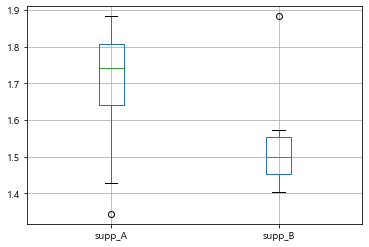

In [7]:
# 자료파일이 없기 때문에 직접 공급자 A와 B를 칼럼으로 하는 dataframe만든다.
df = pd.DataFrame({'supp_A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                      'supp_B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# boxplot을 통해 눈으로 먼저 두 집단 각각의 중위값, 이상치, 사분위를 확인한다.
df.boxplot(['supp_A','supp_B'])

# 그래프 분석
# 사분위수를 나타내고 안에 초록선이 50% 2분위수를 나타낸다. 3분위와 1분위값의 차는 IQR(사분위범위)이다.
# 특히, median을 나타내는 초록선은 데이터의 중앙에 위치한 값으로 이상치의 영향을 덜 받는다.
# 이상치는 그래프를 벗어난 동그라미를 의미한다.

In [8]:
# 2sample t-test 앞서 진행조건인 정규성과 등분산성을 만족하는지 확인한다.
# 'supp_A'의 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['supp_A'])
print("statistic={}, p-value={}".format(statistic, p))

# 결론
# supp_A는 pvalue가 0.08로 귀무가설인 정규성을 만족

statistic=0.8425756096839905, p-value=0.08004552870988846


In [9]:
# 'supp_B'의 정규성 검정 : Shapiro-Wilk Test
statistic, p = stats.shapiro(df['supp_B'])
print("statistic={}, p-value={}".format(statistic, p))

# 결론
# supp_B는 pvalue가 0.01로 귀무가설인 정규성을 만족하지 않는다.
# 따라서 다음 조건인 등분산성을 검정할때는 F-Test가 아닌 Levene's Test를 사용한다.

statistic=0.7734811902046204, p-value=0.014793740585446358


In [10]:
# 등분산 test (levene)
stats.levene(df['supp_A'], df['supp_B'])

# 결론
# LeveneResult에서 pvalue가 0.51이므로 귀무가설인 등분산성을 가진다.

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

In [11]:
# 2sample t-test 분석 실시 (두 집단 서로 독립이 가정이라서 _ind 사용)
t_result = stats.ttest_ind(df['supp_A'], df['supp_B'], equal_var = True)
# stats.ttest_ind 이 분석의 기본 조건이 두 집단의 분산이 같아야 하기 때문에 True라고 적음.

# t_result의 자료값들 중에 t 값과 p값 저장되어 있음.
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-sample t-test t값 p값 출력
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 결론
# 유의수준 5%에서 검정결과 p-value 값이 0.111이므로 공급자간의 두께의 차이가 없다고 볼 수 있다.

2-Sample t-test
t:1.7
p:0.111


## [실습] Paired t-test

In [12]:
# 데이터를 직접 입력한다. 자료파일이 없음...
df1 = pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

# paired t-test (rel은 paired상태에서 집단간에 독립이 아니기때문이다.)
t_result = stats.ttest_rel(df1['before'], df2['after'])    #어차피 df1의 데이터프레임은 컬럼이 before하나밖에 없어서 명시안해줘도 됨.

# paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# paired t-test 의 t값 p값 출력한다.
print("Paired t-test")
print(" t검정 통계량 = %.3f, pvalue = %.3f"% (t,p))

# 결론
# 유의수준 5%에서 pvalue가 0.05 이므로 대립가설을 채택한다.
# 학원가기 전후에 대해 성적의 차이가 있다고 볼 수 있다.

Paired t-test
 t검정 통계량 = -2.266, pvalue = 0.050


## [실습] 1 proportion test

In [13]:
count = 40
n_ob = 100
value = 0.5
# 귀무가설은 H0:p=0.5 
stat, pval = proportions_ztest(count, n_ob, value)
print("1 Proportion test")
print("z:{:0.3f}".format(stat))
print("p:{:0.3f}".format(pval))

# 결론
# 유의수준인 5%에 비해 P-value가 0.041으로 더 작기때문에 동전이 정상이라고 볼 수 없다.

1 Proportion test
z:-2.041
p:0.041


## [실습] 2 proportion test(두 공장의 불량률이 같은가?)

In [14]:
# 귀무가설 H0: p1 = p2 (각각 불량률)
# 변수 선언
# 불량품 개수
count = np.array([14,5])   # 리스트를 array로 감싸줬지만 list꼴로만 정의해도 같은 결과가 나온다.!
# 총 관찰 횟수
nobs = np.array([1200,1200])
# 표본이 30개 넘으니깐 ztest 실시한다.
# z통계값과 pvalue가 나온다.
stat, pval = proportions_ztest(count, nobs)
print("2 Proportion test")
print("z:{:0.3f}".format(stat))
print("p:{:0.3f}".format(pval))

# 결론
# 유의수준인 5%보다 pvalue가 0.038로 더 작기 때문에 두 공정의 불량률이 다르다고 볼 수 있다.

2 Proportion test
z:2.073
p:0.038


## [실습] 카이제곱 검정

In [32]:
df = pd.DataFrame({'A' : [18, 1, 8, 7, 10, 9, 10],
                      'B' : [8,2,14,5,5,9,4],
                      'C' : [4,1,3,4,9,5,4],
                      'D' : [4,1,2,3,2,7,3],
                      'E' : [3,1,3,1,1,1,1],
                      'F' : [3,25,8,10,2,1,7]},
                    index=['A/S', '가격', '성능', '확장성', '디자인', '안정성', '기능성'])

# 카이제곱 검정의 결과값들을 얻는데에는 index지정이 필요없지만
# dataframe의 가독성을 위해 추가하는게 좋을 것이다.
df

,A,B,C,D,E,F
A/S,18,8,4,4,3,3
가격,1,2,1,1,1,25
성능,8,14,3,2,3,8
확장성,7,5,4,3,1,10
디자인,10,5,9,2,1,2
안정성,9,9,5,7,1,1
기능성,10,4,4,3,1,7


In [33]:
# 주어진 dataset을 분석할 chi2_contingency를 가져온다.
from scipy.stats import chi2_contingency

# chi-square test 실행 (데이터만 넣어주면 아래 4가지 결과 모두 나옴.)
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq:{:0.3f}'.format(chi))
print('p:{:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value: \n{}'.format(expected.round(3))) # 기대값

# 결론
# 유의수준 5%에서 pvalue가 0.000이므로 각 제품에 대해 이미지에 대한 차이가 존재한다고 볼 수 있다.

chi-square test
chisq:98.274
p:0.000
degree pf freedom:30
expected value: 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


## [실습] One way ANOVA

In [18]:
# 4개조별로 조별 평균 점수 검정
# 4sample ttest (12조 23조 24조 ..... 2sample ttest 여러번시행해야함)
# ANOVA를 통해 한번에 테스트 가능(2집단 이상)
# F검정(분산분석) 을 통해서 각 그룹의 평균의 차이 여부를 판단

# 데이터 불러오기
# 컬럼 4개중에 charge는 무게를 뜻함. 문제조건에 따라 강종과 type별 정련 시간을 각각 구해본다.
df = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/통계이해/ANOVA.csv", engine = "python")

df

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


<AxesSubplot:title={'center':'time'}, xlabel='[gangjong]'>

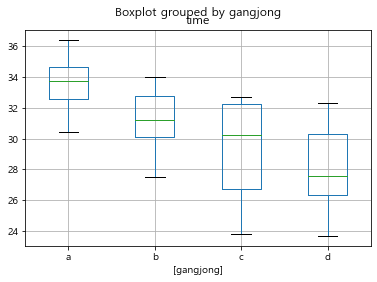

In [104]:
# (1) 강종별로의 시간 구해본다.
df.boxplot(column=['time'],by=['gangjong'])

In [19]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [20]:
# 아노바 실행
# statsmodels 라이브러리 사용
# C는 charactor 즉, 강종이 범주형이라 표시해줌
# time은 y , ols:명령어, fit피팅
# formula  = 'time ~ C(gangjong)'
lm = ols('time ~ C(gangjong)', df).fit()
print(anova_lm(lm))

# C(gangjong)은 그룹간(수준차)에 의한 변동
# residual은 그룹내(오차)에 의한 변동

               df      sum_sq    mean_sq         F    PR(>F)
C(gangjong)   3.0  104.603333  34.867778  4.171868  0.019013
Residual     20.0  167.156667   8.357833       NaN       NaN


In [107]:
# 결론
# 유의수준 5퍼에서 pvalue(=PR)가 0.019 라서 강종별 2차정렬 시간에 차이가 있다고 볼 수 있다.

<AxesSubplot:title={'center':'time'}, xlabel='[type]'>

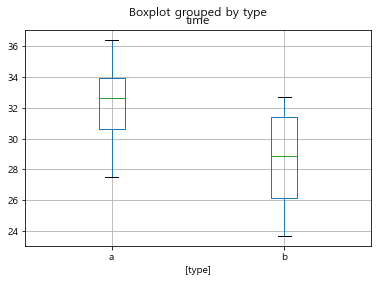

In [21]:
# (2) type에 따른 시간 구해본다.
df.boxplot(column=['time'],by=['type'])

In [22]:
lm = ols('time ~ C(type)', df).fit()
print(anova_lm(lm))

            df      sum_sq    mean_sq         F   PR(>F)
C(type)    1.0   82.881667  82.881667  9.653816  0.00514
Residual  22.0  188.878333   8.585379       NaN      NaN


In [ ]:
# 결론
# 유의수준 5퍼에서 pvalue(=PR)가 0.005 라서 type별 2차정렬 시간(평균)에 차이가 있다고 볼 수 있다.

## [실습] 상관분석(귀무가설은 상관계수=0)

In [40]:
# 상관분석의 귀무가설은 상관관계가 없다는데서 출발한다.
df = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/통계이해/correaltion.csv", engine = "python")

df.head()

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402


In [37]:
# 자료를 파일로 안주고 직접 입력할 시 이렇게 푼다.!!!
# df = pd.DataFrame({'strength' : [18, 1, 8, 7, 10, 9, 10],
#                       'temp' : [8,2,14,5,5,9,4]})
# df

,strength,temp
0,18,8
1,1,2
2,8,14
3,7,5
4,10,5
5,9,9
6,10,4


In [41]:
import pandas as pd
# 강도와 온도의 칼럼만 따로 추출한다.
# df['a'].to_list() 하면 리스트 꼴로 자료 얻을 수있다.
# df1 = df['strength'].to_list()
# df2 = df['temp'].to_list()
# 아래는 dataframe형태로 컬럼 얻을수 있다.!!
df1 = df.get(key= 'strength')
df2 = df.get(key= 'temp')
print(type(df1))

<class 'pandas.core.series.Series'>


In [42]:
# 피어슨 상관계수법을 사용하여 상관계수와 pvalue를 얻는다. 
corr, pval = stats.pearsonr(df1,df2)
# multiple correlation(켄달,스피어맨 법) df.corr(method='pearson').round(3) 인데 어떻게 활용하지??
# 걍 출력하면 chart로 나옴. 
print("Correlation Analysis")
print('corr: {:0.3f}'.format(corr))
print('p-value: {:0.3f}'.format(pval))

Correlation Analysis
corr: -0.899
p-value: 0.000


In [27]:
# 결론
# p-value가 0에 가까우므로 상관성이 있다는 대립가설이 채택된다.
# 또한, corr이 -1에 가까운 값을 가지므로
# 초코칩의 강도와 재료반죽온도간에 "매우 강한 음의 상관성"이 있다고 할 수 있다.

## [실습] 단순선형회귀(손풀이법도 숙지!!사진)

In [53]:
# 위에서 import한 함수를 제외하였다. 
# 회귀분석을 위한 함수를 import
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula (y~X1 + X2 + ...)
import statsmodels.formula.api as smf

# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline

In [54]:
df_raw = pd.read_csv("C:/Users/ParkChihyun/Desktop/2주차 교육자료/통계이해/correaltion.csv", engine = "python")
df_raw

,strength,temp,Quantity,b_time,Oven_TMP
0,37.6,14,120.790646,0.798922,307.106574
1,38.6,15,99.643155,0.849020,318.178850
2,37.2,14,115.102395,0.816163,339.715122
3,36.4,16,114.640504,0.758266,341.174398
4,38.6,17,141.266536,0.815894,335.904402
...,...,...,...,...,...
81,29.9,32,79.594637,0.610326,306.818784
82,30.0,31,82.223257,0.628432,292.587401
83,28.7,33,100.365080,0.610100,307.808118
84,30.0,28,81.398413,0.614772,350.851516


In [55]:
# 위의 DataFrame에서 회귀모델에 쓰일 b_time 과 strength 칼럼만 추출한다.
df_raw2 = df_raw.loc[:, ['strength','b_time']]
df_raw2

,strength,b_time
0,37.6,0.798922
1,38.6,0.849020
2,37.2,0.816163
3,36.4,0.758266
4,38.6,0.815894
...,...,...
81,29.9,0.610326
82,30.0,0.628432
83,28.7,0.610100
84,30.0,0.614772


In [56]:
# 요약 통계량을 구한다.
df_raw2.describe().round(3)

,strength,b_time
count,86.000,86.000
mean,32.192,0.675
std,3.290,0.071
min,27.000,0.540
25%,29.500,0.620
50%,31.000,0.654
75%,34.200,0.735
max,39.000,0.849


<AxesSubplot:xlabel='strength', ylabel='b_time'>

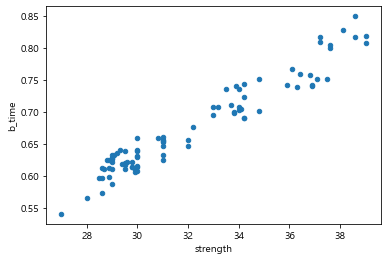

In [57]:
# 회귀분석은 산점도와 상관관계분석을 통한 그래프와 수치의 조합으로 설명한다.
# 목표변수와 설명변수의 산점도 그린다.
df_raw2.plot.scatter(x="strength",y="b_time")

# 결론
# 강도가 증가함에 따라 굽는 시간이 증가한다.

In [58]:
# 목표변수와 설명변수의 상관계수 
df_raw2.corr(method = "pearson").round(3)

# 결론
# 0.966으로 거의 1에 근접하기때문에 매우 높은 선형상관관계가 있다.

,strength,b_time
strength,1.000,0.966
b_time,0.966,1.000


In [59]:
# 회귀모델의 적합도 검정 3가지 중에 2가지인 ANOVA와 Rsquare를 검정해보자

In [60]:
# ANOVA
lm = ols('strength ~ C(b_time)', df).fit()
print(anova_lm(lm))

             df        sum_sq    mean_sq    F  PR(>F)
C(b_time)  85.0  9.200443e+02  10.824051  0.0     NaN
Residual    0.0  4.518595e-26        inf  NaN     NaN


C:\Users\ParkChihyun\anaconda3\lib\site-packages\statsmodels\stats\anova.py:138: RuntimeWarning: divide by zero encountered in double_scalars
  (model.ssr / model.df_resid))


In [62]:
# 회귀 모델을 생성한다.
# ols는 최소자승법 의미
reg_model = smf.ols(formula = "strength~b_time", data = df_raw2)
reg_result = reg_model.fit()
print(reg_result.summary())

# 결과 분석
# R-squared값에 따라 빵의강도로 굽는 시간의 변동의 93.2%를 설명할 수 있다.
# t검정량을 통한 회귀계수의 pvalue값이 0이므로 유의수준인 0.05보다 작아서 유의하다고 할 수 있다.(귀무가설은 회귀계수=0)
# p값을 분산분석의 결과라고도 함.
# prob(omnibus)는 잔차의 정규성 pvalue

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.60e-51
Time:                        17:59:15   Log-Likelihood:                -107.75
No. Observations:                  86   AIC:                             219.5
Df Residuals:                      84   BIC:                             224.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1034      0.885      2.377      0.0

C:\Users\ParkChihyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ParkChihyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


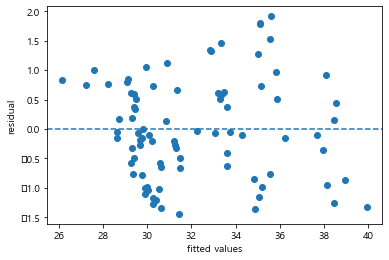

In [63]:
# 오차(잔차)의 기본가정인 등분산성, 독립성, 정규성을 검정한다.
# 등분산성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted values"); plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")
# 잔차가 거의 랜덤하게 같은 폭으로 퍼져있으니깐 등분산성 만족한다고 한다.

C:\Users\ParkChihyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ParkChihyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


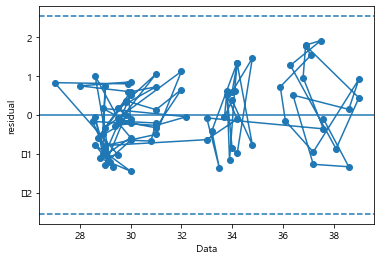

In [65]:
# 독립성 검정
plt.plot(df_raw2["strength"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

# 결론
# 위의 그래프들을 보면 잔차(residual)가 0을 기준으로 random하게 산포되어 있으므로 등분산성과 독립성 만족한다.

NormaltestResult(statistic=5.137339293334113, pvalue=0.07663743249973332)

C:\Users\ParkChihyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ParkChihyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


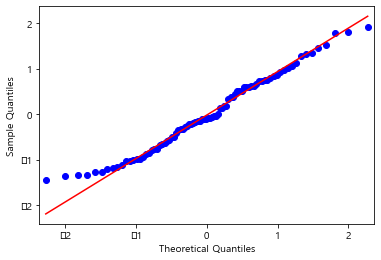

In [127]:
# 잔차의 정규성 검정
# Q-Q plot 과 s-standardized line, r-regression line, q-quartiles를 이용한다.
qqplot(reg_result.resid, line = "q")
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis=0)

# 결론
# 정규분포 직선을 중심으로 잔차가 분포하고 검정 통계량이 귀무가설을 채택하므로 정규분포를 따른다.

In [ ]:
# 최종 회귀식
# y_hat = 2.1034 + 44.5520 * strength
# 빵의 강도가 1 증가할때마다 굽는 시간은 44.55분만큼 증가한다.
# 강도가 1일때는 예상 굽는 시간은 46.6554분이라고 할 수 있다. 

In [ ]:
# 모델리스트, 그래프를 그리기 생성 목적
models = ["회귀분석","의사결정나무",'랜덤 포레스트','그래디언트 부스팅']
# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

In [ ]:
# 회귀분석 예측
lr_y_pred = lr_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [ ]:
# 의사결정나무 예측
dt_y_pred = dt_model.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [ ]:
# 랜덤 포레스트 예측
rf_y_pred = rf_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [ ]:
# 그래디언트 부스팅 예측
gb_y_pred = gb_result.predict(df_test_x)
# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

In [ ]:
#시각화
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)
